In [2]:
import pandas as pd


Đọc dữ liệu từ file subset-covid-data.csv


In [3]:
df = pd.read_csv('C:/Users/DD/Desktop/Data Analyst/subset-covid-data.csv')
df.head()

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0


Tìm hiểu cấu trúc bộ dữ liệu: Số lượng quan sát, số thuộc tính trong bộ dữ liệu, thang đo tương ứng của các thuộc tính

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


Làm sạch dữ liệu


In [14]:
df['date'].value_counts()

2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: date, dtype: int64

=> cần loại bỏ 2 dòng có date khác 12/04/2020

In [4]:
df = df[df['date']=='2020-04-12']
df['date'].value_counts()

2020-04-12    204
Name: date, dtype: int64

Liệu các quốc gia có số lượng ca mắc mới trong ngày 12-4-2020, số ca tử vong trong ngày 12-4-2022 có giống nhau hay không?


trung bình số ca mắc mới: 376.8186274509804
trung vị của số ca mắc mới: 11.5


Text(0, 0.5, 'Số lượng quốc gia')

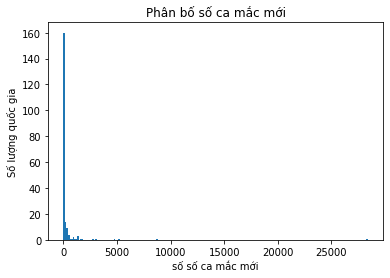

In [5]:
print ("trung bình số ca mắc mới: " + str(df.cases.mean()))
print ("trung vị của số ca mắc mới: "+ str(df.cases.median()))
import matplotlib.pyplot as plt
plt.hist(df.cases, bins = 200)
plt.title("Phân bố số ca mắc mới")
plt.xlabel("số số ca mắc mới")
plt.ylabel("Số lượng quốc gia")

Tổng số ca mắc mới, số ca tử vong của từng châu lục

In [11]:
df.groupby('continent')['cases','deaths'].sum()

C:\Users\DD\AppData\Local\Temp\ipykernel_3752\2990098081.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('continent')['cases','deaths'].sum()


,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,29591,2966
Oceania,68,4


Top 5 quốc gia có số ca nhiễm mới cao nhất


In [16]:
new = pd.DataFrame(df.groupby('country')['cases'].sum())
new.sort_values('cases',ascending=False)

,cases
country,
United_States_of_America,28391
United_Kingdom,8719
Turkey,5138
Italy,4694
France,3114
...,...
Congo,0
Nicaragua,0
New_Caledonia,0


Top 5 quốc gia có số tử vong cao nhất


In [17]:
df = df.sort_values('deaths',ascending=False)
df

,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
18,Belgium,Europe,2020-04-12,12,4,2020,1351,327,BEL,11422068.0
...,...,...,...,...,...,...,...,...,...,...
84,Guinea_Bissau,Africa,2020-04-12,12,4,2020,3,0,GNB,1874309.0
85,Guyana,America,2020-04-12,12,4,2020,5,0,GUY,779004.0
86,Haiti,America,2020-04-12,12,4,2020,2,0,HTI,11123176.0
87,Holy_See,Europe,2020-04-12,12,4,2020,0,0,VAT,1000.0
